<a href="https://colab.research.google.com/github/JumanaRahim/workshop/blob/master/drowsiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/dataset_new.zip 

Archive:  /content/dataset_new.zip
   creating: dataset_new/
   creating: dataset_new/test/
   creating: dataset_new/test/no_yawn/
  inflating: dataset_new/test/no_yawn/1004.jpg  
  inflating: dataset_new/test/no_yawn/1007.jpg  
  inflating: dataset_new/test/no_yawn/1010.jpg  
  inflating: dataset_new/test/no_yawn/1033.jpg  
  inflating: dataset_new/test/no_yawn/1044.jpg  
  inflating: dataset_new/test/no_yawn/1050.jpg  
  inflating: dataset_new/test/no_yawn/1063.jpg  
  inflating: dataset_new/test/no_yawn/1067.jpg  
  inflating: dataset_new/test/no_yawn/1096.jpg  
  inflating: dataset_new/test/no_yawn/1114.jpg  
  inflating: dataset_new/test/no_yawn/1118.jpg  
  inflating: dataset_new/test/no_yawn/1129.jpg  
  inflating: dataset_new/test/no_yawn/113.jpg  
  inflating: dataset_new/test/no_yawn/1134.jpg  
  inflating: dataset_new/test/no_yawn/115.jpg  
  inflating: dataset_new/test/no_yawn/1213.jpg  
  inflating: dataset_new/test/no_yawn/1267.jpg  
  inflating: dataset_new/test/no_yawn/

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!rm -r /content/drive/MyDrive/archive/dataset_new/test/Closed

rm: cannot remove '/content/drive/MyDrive/archive/dataset_new/test/Closed': No such file or directory


In [5]:
!rm -r /content/drive/MyDrive/archive/dataset_new/test/Open

rm: cannot remove '/content/drive/MyDrive/archive/dataset_new/test/Open': No such file or directory


In [6]:
!rm -r /content/drive/MyDrive/archive/dataset_new/train/Closed

rm: cannot remove '/content/drive/MyDrive/archive/dataset_new/train/Closed': No such file or directory


In [ ]:
!rm -r /content/drive/MyDrive/archive/dataset_new/train/Open

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [48]:
!rm -r /content/drowsiness_cropped/train/.ipynb_checkpoints

In [49]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/drowsiness_cropped/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1310 images belonging to 2 classes.


In [50]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/drowsiness_cropped/test',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')

Found 215 images belonging to 2 classes.


In [34]:
im=plt.imread("/content/drive/MyDrive/archive/dataset_new/train/yawn/11.jpg")


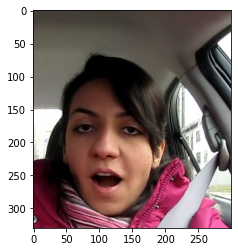

In [35]:
plt.imshow(im[20:350, 200:500, :])

In [40]:
import os

In [41]:
import glob
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/test/no_yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/test/no_yawn" , f'test_images_noyawn{i}.jpg'), im)

In [42]:
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/test/yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/test/yawn" , f'test_images_yawn{i}.jpg'), im)

In [47]:
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/train/no_yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/train/no_yawn" , f'train_images_noyawn{i}.jpg'), im)

In [45]:
i=0
for img in glob.glob("/content/drive/MyDrive/archive/dataset_new/train/yawn/*.jpg"):
  i=i+1

  n= cv2.imread(img)
  im=n[20:350, 200:500, :]
  cv2.imwrite(os.path.join("/content/drowsiness_cropped/train/yawn" , f'train_images_yawn{i}.jpg'), im)

In [69]:
#build CNN model
#intialize
cnn=tf.keras.models.Sequential()

In [70]:
from tensorflow.keras import layers

In [71]:

layers.RandomFlip("horizontal_and_vertical"),
layers.RandomRotation(0.2),

(<keras.layers.preprocessing.image_preprocessing.RandomRotation at 0x7f42a02cb490>,)

In [72]:
#convolution
from keras.regularizers import l2
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3],
                               kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))



cnn.add(tf.keras.layers.Dropout(0.3))

In [73]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [74]:
#Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [75]:
#add one more layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3],
       kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [76]:
#Flatten
cnn.add(tf.keras.layers.Flatten())

In [77]:
#Full Connection
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [78]:
#Output layer
cnn.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [79]:
#Compile the model
cnn.compile(optimizer='SGD',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [80]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_3 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                  

In [81]:
history=cnn.fit(x=train_generator,validation_data=validation_generator,epochs=50)

Epoch 1/50
41/41 [==============================] - 6s 130ms/step - loss: 1.0668 - accuracy: 0.5122 - val_loss: 1.0622 - val_accuracy: 0.5209
Epoch 2/50
41/41 [==============================] - 5s 112ms/step - loss: 1.0543 - accuracy: 0.5527 - val_loss: 1.0529 - val_accuracy: 0.5442
Epoch 3/50
41/41 [==============================] - 5s 110ms/step - loss: 1.0415 - accuracy: 0.6008 - val_loss: 1.0457 - val_accuracy: 0.5116
Epoch 4/50
41/41 [==============================] - 4s 108ms/step - loss: 1.0317 - accuracy: 0.5969 - val_loss: 1.0376 - val_accuracy: 0.5302
Epoch 5/50
41/41 [==============================] - 4s 109ms/step - loss: 1.0180 - accuracy: 0.5992 - val_loss: 1.0295 - val_accuracy: 0.5721
Epoch 6/50
41/41 [==============================] - 4s 109ms/step - loss: 1.0067 - accuracy: 0.6153 - val_loss: 1.0192 - val_accuracy: 0.5814
Epoch 7/50
41/41 [==============================] - 4s 109ms/step - loss: 0.9973 - accuracy: 0.6092 - val_loss: 1.0122 - val_accuracy: 0.5674
Epoch 

In [ ]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


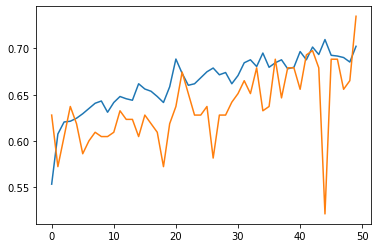

In [ ]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.show()

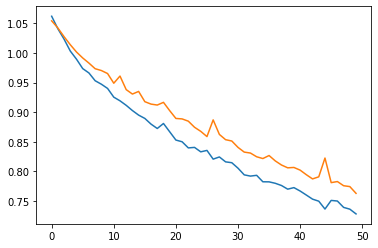

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('/content/testing/testing/gha_/WIN_20220522_08_55_13_Pro resized.jpg',target_size=(64,64))

test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction='cha'
if result[0][1]==1:
    prediction='chcha'
if result[0][2]==1:
    prediction='gaa'
if result[0][3]==1:
    prediction='gha'
if result[0][4]==1:
    prediction='jaa'
if result[0][5]==1:
    prediction='ka'
if result[0][6]==1:
    prediction='kha'
if result[0][7]==1:
    prediction='nga'  

    


In [ ]:
prediction

'gha'

In [ ]:
 train_generator.class_indices
    

{'cha new': 0,
 'chcha new': 1,
 'gaa new (2)': 2,
 'gha new': 3,
 'jaa new': 4,
 'ka_new': 5,
 'kha_new': 6,
 'nga new (2)': 7}

In [ ]:
result


array([[0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/dataset_new/train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1233 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        '/content/dataset_new/test',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')

Found 215 images belonging to 2 classes.


In [ ]:
cnn1=tf.keras.models.Sequential()

In [ ]:
from keras.regularizers import l2
cnn1.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[64,64,3],
                               kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))



cnn1.add(tf.keras.layers.Dropout(0.3))

In [ ]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3],
       kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn1.add(tf.keras.layers.Dropout(0.2))
cnn1.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn1.add(tf.keras.layers.Flatten())

In [ ]:
cnn1.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
cnn1.add(tf.keras.layers.Dense(units=2,activation='softmax'))

In [ ]:
cnn1.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 dropout (Dropout)           (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    

In [ ]:
history=cnn1.fit(x=train_generator,validation_data=validation_generator,epochs=50)

Epoch 1/50
39/39 [==============================] - 11s 208ms/step - loss: 1.0569 - accuracy: 0.5377 - val_loss: 0.8777 - val_accuracy: 0.5628
Epoch 2/50
39/39 [==============================] - 8s 215ms/step - loss: 0.8010 - accuracy: 0.6488 - val_loss: 0.7858 - val_accuracy: 0.6186
Epoch 3/50
39/39 [==============================] - 8s 198ms/step - loss: 0.7533 - accuracy: 0.6618 - val_loss: 0.7530 - val_accuracy: 0.6558
Epoch 4/50
39/39 [==============================] - 8s 201ms/step - loss: 0.6993 - accuracy: 0.6853 - val_loss: 0.7221 - val_accuracy: 0.6605
Epoch 5/50
39/39 [==============================] - 8s 201ms/step - loss: 0.6830 - accuracy: 0.6975 - val_loss: 0.6997 - val_accuracy: 0.6977
Epoch 6/50
39/39 [==============================] - 8s 200ms/step - loss: 0.6757 - accuracy: 0.6886 - val_loss: 0.6915 - val_accuracy: 0.6977
Epoch 7/50
39/39 [==============================] - 8s 203ms/step - loss: 0.6508 - accuracy: 0.7040 - val_loss: 0.6811 - val_accuracy: 0.7070
Epoch

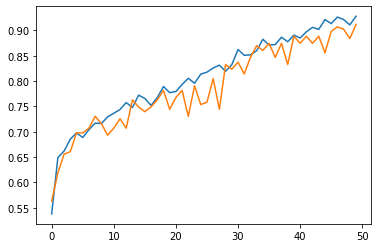

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

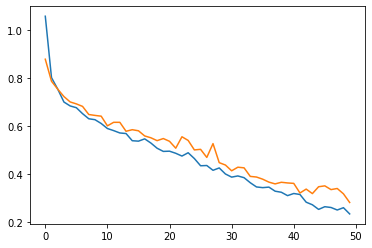

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])